In [1]:
import pandas as pd
from google.colab import files

# Upload the file from your computer
uploaded = files.upload()

# Get file name from upload
file_name = list(uploaded.keys())[0]

# Load into DataFrame
df = pd.read_csv(file_name)

print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.head()


Saving student_feedback.csv to student_feedback.csv
Rows: 1001 | Columns: 10


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [2]:
# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_').replace('__','_') for c in df.columns]

# Remove extra spaces in text columns
if 'course_name' in df.columns:
    df['course_name'] = df['course_name'].str.strip()

if 'basic_course_category' in df.columns:
    df['basic_course_category'] = df['basic_course_category'].str.strip()

df.head()


,unnamed:_0,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [5]:
import numpy as np

rating_cols = ['well_versed_with_the_subject', 'explains_concepts_in_an_understandable_way',
               'use_of_presentations', 'degree_of_difficulty_of_assignments',
               'solves_doubts_willingly', 'structuring_of_the_course',
               'provides_support_for_students_going_above_and_beyond',
               'course_recommendation_based_on_relevance']


df['total_responses_by_student'] = df[rating_cols].sum(axis=1)

df['computed_average_rating'] = df[rating_cols].mean(axis=1)


df[['student_id', 'computed_average_rating']].head()

,student_id,computed_average_rating
0,340,5.000
1,253,4.875
2,680,4.375
3,806,5.875
4,632,7.500


In [7]:
# Top 10
top_qs = df.sort_values('computed_average_rating', ascending=False).head(10)
print("Top 10 Questions by Avg Rating:")
display(top_qs[['total_responses_by_student', 'computed_average_rating']])

# Bottom 10
bottom_qs = df.sort_values('computed_average_rating', ascending=True).head(10)
print("Bottom 10 Questions by Avg Rating:")
display(bottom_qs[['total_responses_by_student', 'computed_average_rating']])


Top 10 Questions by Avg Rating:


,total_responses_by_student,computed_average_rating
199,66,8.250
110,66,8.250
692,66,8.250
580,65,8.125
658,65,8.125
646,65,8.125
103,65,8.125
304,64,8.000
437,64,8.000
869,64,8.000


Bottom 10 Questions by Avg Rating:


,total_responses_by_student,computed_average_rating
644,27,3.375
592,27,3.375
743,28,3.500
612,29,3.625
285,29,3.625
950,30,3.750
17,30,3.750
583,30,3.750
722,31,3.875
19,31,3.875


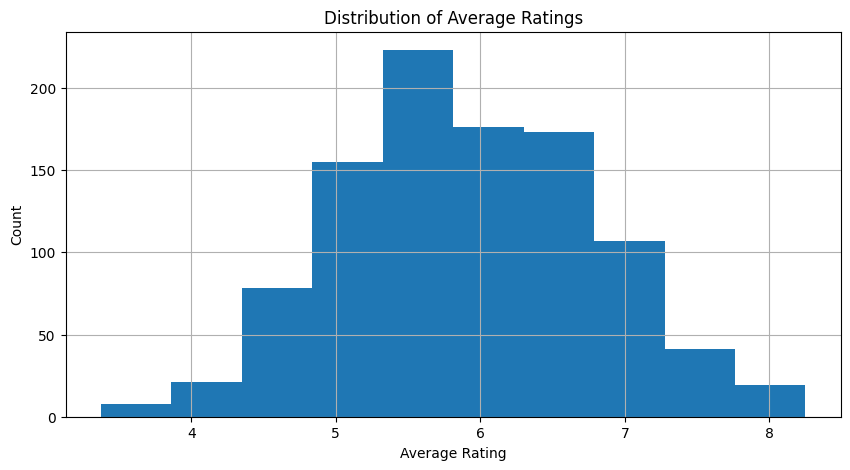

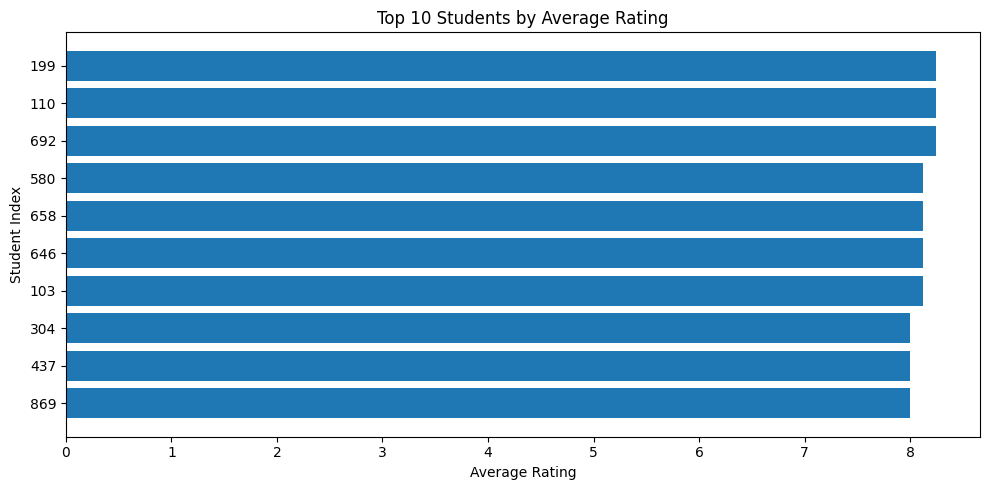

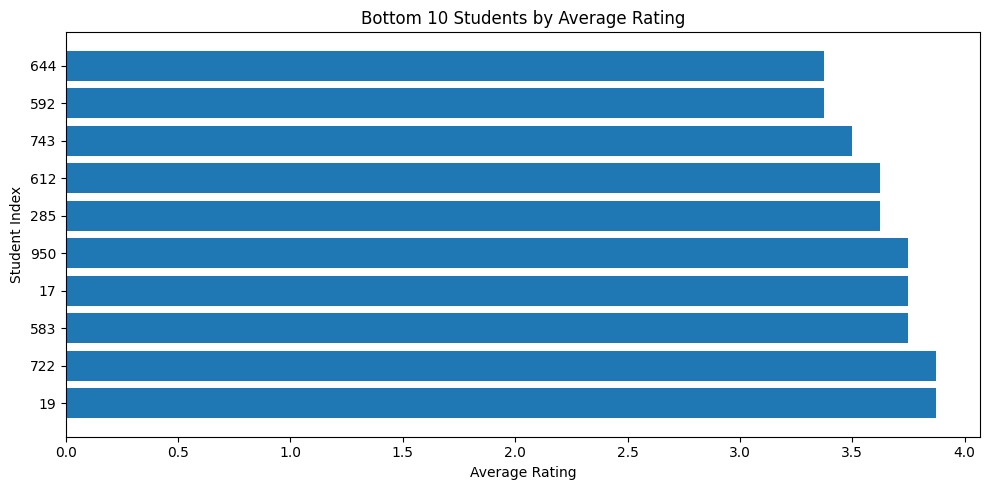

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)

# Histogram of ratings
plt.hist(df['computed_average_rating'].dropna(), bins=10)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Top 10 students chart
plt.barh(top_qs.index.astype(str)[::-1], top_qs['computed_average_rating'][::-1])
plt.title('Top 10 Students by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Student Index')
plt.tight_layout()
plt.show()

# Bottom 10 students chart
plt.barh(bottom_qs.index.astype(str)[::-1], bottom_qs['computed_average_rating'][::-1])
plt.title('Bottom 10 Students by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Student Index')
plt.tight_layout()
plt.show()

In [11]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [13]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# TextBlob polarity
df['textblob_polarity'] = df['total_responses_by_student'].apply(lambda t: TextBlob(str(t)).sentiment.polarity)

# VADER compound score
df['vader_compound'] = df['total_responses_by_student'].apply(lambda t: analyzer.polarity_scores(str(t))['compound'])

# Classify
df['tb_sentiment'] = df['textblob_polarity'].apply(lambda p: 'positive' if p>0.1 else ('negative' if p<-0.1 else 'neutral'))
df['vader_sentiment'] = df['vader_compound'].apply(lambda c: 'positive' if c>=0.05 else ('negative' if c<=-0.05 else 'neutral'))

print("TextBlob Sentiment Counts:\n", df['tb_sentiment'].value_counts())
print("\nVADER Sentiment Counts:\n", df['vader_sentiment'].value_counts())


TextBlob Sentiment Counts:
 tb_sentiment
neutral    1001
Name: count, dtype: int64

VADER Sentiment Counts:
 vader_sentiment
neutral    1001
Name: count, dtype: int64


In [16]:
df.to_csv('student_feedback_cleaned.csv', index=False)
print("Cleaned data saved to student_feedback_cleaned.csv")

Cleaned data saved to student_feedback_cleaned.csv


In [17]:
files.download("student_feedback_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>